<a href="https://colab.research.google.com/github/ssumannb/BigData_Analyst_exam/blob/main/bmi_dataset.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

[빅분기실기1유형]  
17주차 예상문제 (실기1유형 10문제)

In [1]:
import pandas as pd
df_org =pd.read_csv('https://raw.githubusercontent.com/Datamanim/datarepo/main/body/body.csv')
df_org.head()

,측정나이,측정회원성별,신장 : cm,체중 : kg,체지방율 : %,이완기혈압(최저) : mmHg,수축기혈압(최고) : mmHg,악력D : kg,앉아윗몸앞으로굽히기 : cm,교차윗몸일으키기 : 회,제자리 멀리뛰기 : cm,등급
0,59.0,M,175.0,70.6,19.2,91.0,150.0,40.6,12.2,30.0,179.0,C
1,40.0,F,161.4,45.8,21.7,62.0,119.0,22.1,16.0,32.0,165.0,B
2,27.0,M,176.6,84.8,19.2,87.0,153.0,45.9,13.2,61.0,216.0,B
3,38.0,M,167.6,76.7,24.7,63.0,132.0,43.6,16.0,45.0,231.0,A
4,21.0,M,165.2,66.2,21.5,83.0,106.0,33.5,10.6,46.0,198.0,C


Q1.  전체데이터의 수축기혈압(최고) - 이완기혈압(최저)의 평균을 구하여라  
A1. 52.195

In [ ]:
df = df_org.copy()
df['diff'] = df['수축기혈압(최고) : mmHg'] - df['이완기혈압(최저) : mmHg']

print(df['diff'].mean())

52.19539414750672


Q2. 50~59세의 신장평균을 구하여라  
A2. 164.074

In [ ]:
df = df_org.copy()

result = df.loc[(df['측정나이'] < 60) & (df['측정나이'] > 49), '신장 : cm'].mean()
print(result)

164.07490107405314


Q3. 연령대 (20~29 : 20대 ...) 별  인원수를 구하여라  
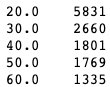

In [12]:
df['gen'] = df['측정나이'] // 10 * 10
result = df['gen'].value_counts()
print(result)

20.0    5831
30.0    2660
40.0    1801
50.0    1769
60.0    1335
Name: gen, dtype: int64


Q4.  연령대 (20~29 : 20대 ...) 별 등급의 숫자를 데이터 프레임으로 표현하라  
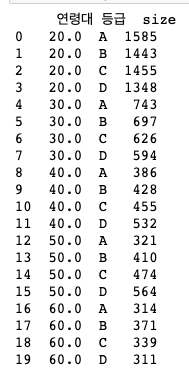

In [17]:
df = df_org.copy()

df['gen'] = df['측정나이'] // 10 * 10
grade = df.groupby(['gen', '등급'])
print(grade.size())

gen   등급
20.0  A     1585
      B     1443
      C     1455
      D     1348
30.0  A      743
      B      697
      C      626
      D      594
40.0  A      386
      B      428
      C      455
      D      532
50.0  A      321
      B      410
      C      474
      D      564
60.0  A      314
      B      371
      C      339
      D      311
dtype: int64


Q5. 남성 중 A등급과 D등급의 체지방률 평균의 차이(큰 값에서 작은 값의 차)를 구하여라  
A5. 7.93208

In [20]:
df = df_org.copy()

men_a = df.loc[(df['측정회원성별'] == 'M') & (df['등급'] =='A'), '체지방율 : %'].mean()
men_d = df.loc[(df['측정회원성별'] == 'M') & (df['등급'] =='D'),  '체지방율 : %'].mean()

print(abs(men_a - men_d))

7.932086486137521


Q6. 여성 중 A등급과 D등급의 체중의 평균의 차이(큰 값에서 작은 값의 차)를 구하여라  
A6. 5.17

In [22]:
df = df_org.copy()

men_a = df.loc[(df['측정회원성별'] == 'F') & (df['등급'] =='A'), '체중 : kg'].mean()
men_d = df.loc[(df['측정회원성별'] == 'F') & (df['등급'] =='D'), '체중 : kg'].mean()

print(abs(men_a - men_d))

5.176211590296504


Q7. bmi는 자신의 몸무게(kg)를 키의 제곱(m)으로 나눈값이다. 데이터의 bmi 를 구한 새로운 컬럼을 만들고 남성의 bmi 평균을 구하여라  
A7. 24.461

In [26]:
df = df_org.copy()

df['bmi'] = df['체중 : kg'] / (df['신장 : cm']/100)**2
result = df.loc[df['측정회원성별']=='M', 'bmi'].mean()

print(result)

24.46134409819308


Q8. bmi보다 체지방율이 높은 사람들의 체중평균을 구하여라  
A8. 61.740

In [27]:
#df = df_org.copy()

result = df.loc[df['체지방율 : %'] > df['bmi'], '체중 : kg'].mean()
print(result)

61.7408806392542


Q9. 남성과 여성의 악력 평균의 차이를 구하여라  
A9. 17.55

In [31]:
df = df_org.copy()

grasp_mean = df['악력D : kg'].groupby(df['측정회원성별']).mean()
result = abs(grasp_mean[0]-grasp_mean[1])
print(result)

17.55954185047465


Q10.남성과 여성의 교차윗몸일으키기 횟수의 평균의 차이를 구하여라​  
A10.14.24

In [33]:
df = df_org.copy()

grasp_mean = df['교차윗몸일으키기 : 회'].groupby(df['측정회원성별']).mean()
result = abs(grasp_mean[0]-grasp_mean[1])
print(result)

14.243156833157627
